# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [160]:
# Importação das bibliotecas que possivelmente serão utilizadas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# Instanciando o dataframe através do arquivo .csv
df = pd.read_csv("winequality-red.csv", delimiter=',')

# Fazendo uma breve verificação dos dados
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

## Verificando os tipos de dados

In [138]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Temos uma base inicial de 1599 linhas de dados, com 11 tipos de dados _float_ e apenas um como _int_. A variável `quality` é do tipo _int_, vai de 0 a 10 e é nossa variável _target_.

## Verificando dados nulos ou faltantes.

### Dados duplicados

In [139]:
# Verificando dados duplicados
print('Quantidade de dados duplicados: ', df.duplicated().sum())

# Deletando dados duplicados
df.drop_duplicates(inplace=True)

# Reconferindo
print('Conferindo dados duplicados: ', df.duplicated().sum())

Quantidade de dados duplicados:  240
Conferindo dados duplicados:  0


### Dados nulos

In [140]:
# Verificando dados nulos
print('Quantidade de dados nulos: ', df.isnull().sum().sum())

Quantidade de dados nulos:  0


Gosto sempre de verificar dados duplicados antes. Dados duplicados já foram extraídos do DataFrame.  
Não foi encontrado dados nulos.

# 2 - Realize a segunda e terceira etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


## Verificando outliers e a distribuição dos dados.

In [141]:
# Observando os dados do DataFrame
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Após utilizar a função `df.describe()` podemos visualizar 5 colunas com valores discrepantes, considerados outliers, sendo elas:
- _residual sugar_
- _chlorides_
- _free sulfur dioxide_
- _total sulfur dioxide_
- _sulphates_

Também podemos notar que os quartis de 25% a 75% (metade do DataFrame) contém as notas `quality` entre 5 e 6, já sendo possível verificar um grande desbalanceamento de classes.

## Verificando o balanceamento da variável target (quality)

In [176]:
# Exibindo a quantidade de dados para a variável quality
print('Balanceamento do DataFrame padrão:\n\n', df['quality'].value_counts())

# Exibindo em percentual
valores_percentuais = df['quality'].value_counts(normalize=True)*100
print('\n\nPorcetagem de cada nota de quality sobre o total: \n', valores_percentuais.round(2))

Balanceamento do DataFrame padrão:

 quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


Porcetagem de cada nota de quality sobre o total: 
 quality
5    42.59
6    39.90
7    12.45
4     3.31
8     1.13
3     0.63
Name: proportion, dtype: float64


As variáveis estão desbalanceadas, considerando que as notas de qualidade 5, 6 e 7 contém o maior número de dados pertencentes. Logo abaixo mostramos também a quantidade em percentual para cada variável, sendo que as classificações de qualidade 5 e 6 já somam o total de 81% de todo o DataFrame.

## Identificando variáveis mais correlatas

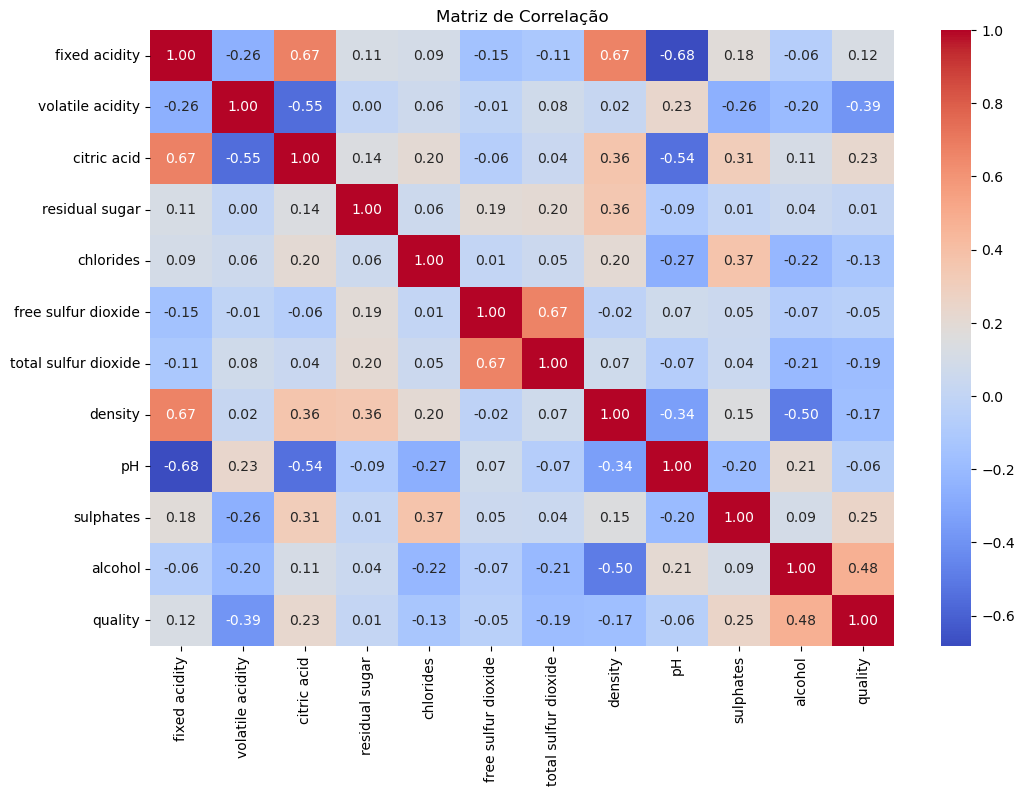

In [178]:
# Instanciando a matriz de correlação
correlation_matrix = df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

Podemos identificar duas variáveis com mais força de correlação para a variável `quality`, sendo elas:
- alcohol (correlação positiva)
- volatile acidity (correlação negativa)

Para variáveis com *correlação positiva*, significa que a variável `quality` aumenta conforme estas variáveis também aumentam.  
Para variáveis com *correlação negativa*, significa que a variável `quality` aumenta conforme estas variáveis diminuem.

## Separando as principais variáveis mais fortes

In [179]:
# Instanciando o DataFrame com as variáveis mais correlatas
df_corr = df[['alcohol', 'volatile acidity', 'quality']]

# Fazendo a verificação
df_corr

,alcohol,volatile acidity,quality
0,9.4,0.700,5
1,9.8,0.880,5
2,9.8,0.760,5
3,9.8,0.280,6
4,9.4,0.700,5
...,...,...,...
1594,10.5,0.600,5
1595,11.2,0.550,6
1596,11.0,0.510,6
1597,10.2,0.645,5


# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


### Separando bases X e Y (entrada e target)

In [146]:
# Separando a base X (variáveis de entrada) e Y (variável target)
X = df_corr.drop('quality', axis=1) # Base de treino
y = df_corr['quality'] # Base de testes

### Separando as bases de treino e teste

In [180]:
# Separando as bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Verificando balanceamento da variável target na base treino
y_train.value_counts()

quality
5    429
6    403
7    126
4     41
8     14
3      6
Name: count, dtype: int64

# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [148]:
# Iniciando o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

In [181]:
# Treinando o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Avaliando o modelo

In [182]:
# Gerando variável de predições
y_pred = rf_model.predict(X_test)

In [184]:
accuracy = accuracy_score(y_test, y_pred) # Variável de Acurácia para análise
report = classification_report(y_test, y_pred) 
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibindo os dados
print(f"Acurácia: {accuracy:.2f}")
print('Relatório de Classificação:\n', report)

Acurácia: 0.55
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.25      0.08      0.12        12
           5       0.64      0.70      0.67       148
           6       0.50      0.52      0.51       132
           7       0.47      0.37      0.41        41
           8       0.00      0.00      0.00         3

    accuracy                           0.55       340
   macro avg       0.31      0.28      0.29       340
weighted avg       0.54      0.55      0.54       340



### Plotando o gráfico da Matriz de Confusão

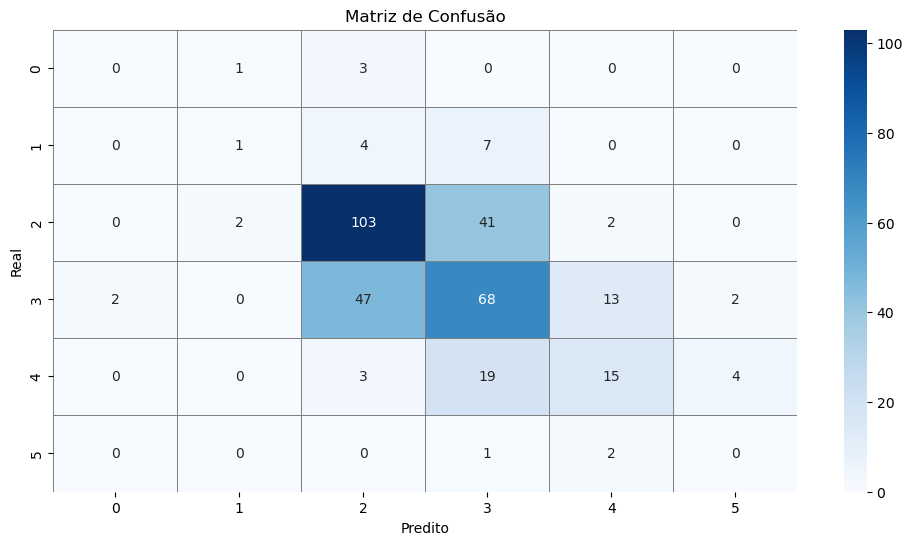

In [185]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


### Avaliando as metricas

*A)* As métricas não foram boas. Primeiro de tudo, a *acurácia* ficou em torno de 55%. Isso significa que se o modelo arriscasse dizer que a variável `quality` do vinho fosse 5 ou 6, ele teria a mesma acurácia.  
O modelo apenas aprendeu a classificar `quality`'s 5 e 6. O modelo simplesmente ignora as classes minoritárias, pois temos zero precisão e zero recall para as variáveis 3, 4 e 8  

*B)* O modelo sofreu muito para aprender qualquer outra classe de `quality` que não fosse 5 ou 6. Podemos afirmar com alto grau de certeza que, como os dados estão muito desbalanceados (a maior quantidade de classes estão em 5 e 6) ele não tem conteúdo suficiente para aprender a prever as outras classes.

# 6 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

### Definindo o Grid de parâmetros

In [153]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [200, 500, 1000], # Define quantas "árvores" serão criadas dentro da "floresta" (mais árvores tendem a decisões mais estáveis)
    'max_depth': [None, 10, 20, 30, 50], # Define o quão profundo cada árvore pode ir (muito profunda = overfitting, limitada = generaliza melhor)
    'min_samples_split': [2, 5, 10, 20], # Define quantas amostras precisam existir em um nó para ele se dividir em galhos
    'min_samples_leaf': [1, 2, 4, 8], # Define quantas amostras no mínimo podem existir numa folha (evita decisões malucas)
    'max_features': ['sqrt', 'log2', None], # Quantas features o modelo pode considerar em cada divisão da árvore
    'bootstrap': [True, False], # Define se as árvores devem ser treinadas com amostras repetidas ou não
    'class_weight': ['balanced', 'balanced_subsample'] # Solução para classes balanceadas
}

### Iniciando o treino de um novo modelo

In [186]:
from sklearn.model_selection import RandomizedSearchCV # Importando a biblioteca desejada

rf_model2 = RandomForestClassifier(random_state=42) # Instanciando o modelo de RandomForest

# Configurando o Grid Search
random_rf_model = RandomizedSearchCV(
    estimator=rf_model2,
    param_distributions=param_grid,
    n_iter=50, # Quantidade de iterações aleatórias que vamos fazer
    scoring='accuracy', # Métrica que queremos considerar para cada iteração
    cv=5, # Quantidade de separação de bases para o cross-validation
    n_jobs=-1, # Usando todo o potencial da máquina
    random_state=42
)

# Treinando o modelo
random_rf_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [200, 500, 1000]},
                   random_state=42, scoring='accuracy')

### Exibindo os melhores parâmetros encontrados pelo RandomSearchCV

In [188]:
# Exibindo os melhores parametros
print(random_rf_model.best_params_)

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': True}


### Treinando um novo modelo com os melhores parâmetros

In [189]:
# Instanciando o modelo com os melhores parâmetros
best_rf_model = random_rf_model.best_estimator_

In [190]:
# Verificando as previsões com o melhor modelo
y_pred_random = best_rf_model.predict(X_test)

# Criando o relatório de classificação
report_random = classification_report(y_test, y_pred_random)

### Avaliando o novo modelo

In [191]:
accuracy = accuracy_score(y_test, y_pred_random) # Instanciando a variável accuracy para análise

print('Acurácia: ', accuracy)
print('Relatório de Métricas com Random Search: \n\n', report_random)

Acurácia:  0.5411764705882353
Relatório de Métricas com Random Search: 

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.09      0.08      0.09        12
           5       0.66      0.71      0.69       148
           6       0.50      0.42      0.46       132
           7       0.46      0.51      0.48        41
           8       0.09      0.33      0.14         3

    accuracy                           0.54       340
   macro avg       0.30      0.34      0.31       340
weighted avg       0.54      0.54      0.54       340



Como podemos conferir, o novo modelo após o uso do `RandomSearchCV` apresentou resultados de acurácia parecidos: 0.55%.  *Porém*, tivemos mais acertos em classes diferentes de 5 e 6. Ou seja: o modelo ficou menos obcecado pela classe 5 (maior valor de classes para este Dataset) e pôde adivinhar outras classes, apesar de baixa acurácia.  

No geral, podemos afirmar que após o _tuning_ dos hiperparâmetros, o modelo melhorou na questão de poder generalizar um pouco melhor (apesar de não muito) mesmo mantendo a mesma acurácia. Ele adivinhou uma quantidade próxima de classes, mas desta vez classes diferentes de 5 e 6.

# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

O que podemos fazer para melhorar ainda mais o modelo e suas previsões:  
1. Lidar com o desbalanceamento: o modelo contém muitas classes próximas de 5 e 6, e as outras estão completamente desbalanceadas. Poderíamos utilizar a biblioteca `SMOTE` para que na base de treino, o modelo aprenda a generalizar melhor as classes.
2. Testar outros modelos: como temos o uso de uma variável contínua e de classificação, talvez a *Regressão Logística* pode nos ajudar com mais facilidade aqui.
3. Tratamento de outliers: apesar de identificado algumas variáveis com outliers, o exercício pede apenas para fazer a verificações delas. Estas por sua vez, ao serem tratadas podem ajudar a aumentar a correlação de outras features que nos ajudariam a prever melhor a classe `quality`.